In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.16.1
Keras version: 3.3.3


In [7]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Vivek\Downloads\wine.csv')

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [41]:
X=df.iloc[:,0:11]
y=df.iloc[:,-1]

In [42]:
X.shape,y.shape

((1599, 11), (1599,))

In [43]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
df['quality'] = LabelEncoder().fit_transform(df['quality'])


In [32]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [44]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

In [46]:
import matplotlib.pyplot as plt

In [51]:
from sklearn.model_selection import train_test_split


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit on training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform test set (using the same scaler fitted on training set)
X_test_scaled = scaler.transform(X_test)

In [92]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2


In [103]:
model = Sequential()

model.add(Dense(20,activation='relu',input_dim=X_train_scaled.shape[1],))
model.add(Dense(10,activation='relu'))

model.add(Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 20)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Logging
import os
import time 

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit\log_2024_06_19_16_54_42


In [59]:
# logging
log_folder = 'logs'
%load_ext tensorboard
#!rm -rf logs
!rm -rf logs
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_folder,histogram_freq=1)

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [135]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [136]:
CKPT_path = "Model_ckpt.h5.keras"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True,monitor='val_loss')

In [137]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [138]:
# Orginal train

EPOCHS = 500
VALIDATION_SET =(X_test_scaled, y_test)


history = model.fit(X_train_scaled, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET,callbacks=[tb_cb, early_stopping_cb,checkpointing_cb])


Epoch 1/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7855 - loss: 0.4480 - val_accuracy: 0.7375 - val_loss: 0.4935
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7845 - loss: 0.4488 - val_accuracy: 0.7437 - val_loss: 0.4962
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8037 - loss: 0.4191 - val_accuracy: 0.7437 - val_loss: 0.4934
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8027 - loss: 0.4281 - val_accuracy: 0.7437 - val_loss: 0.4944
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7918 - loss: 0.4311 - val_accuracy: 0.7469 - val_loss: 0.4933
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7836 - loss: 0.4493 - val_accuracy: 0.7437 - val_loss: 0.4955
Epoch 7/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7990 - loss: 0.4365 - val_accuracy: 0.7437 - val_loss: 0.4952
Epoch 8/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7981 - loss: 0.4240 - val_accuracy: 0.7437 - v

In [145]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [146]:
%tensorboard --logdir={log_folder}

In [139]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [130]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH 

Model Model_2024_06_19_17_59_00_.h5 will be saved at TRAINED_MODEL\Model_2024_06_19_17_59_00_.h5


'TRAINED_MODEL\\Model_2024_06_19_17_59_00_.h5'

In [140]:
tf.keras.models.save_model(model, UNIQUE_PATH)

In [141]:
history.params

{'verbose': 'auto', 'epochs': 500, 'steps': 40}

In [142]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.788116,0.438999,0.737500,0.493450
1,0.792025,0.436941,0.743750,0.496158
2,0.793589,0.438345,0.743750,0.493367
3,0.793589,0.436156,0.743750,0.494416
4,0.792025,0.435275,0.746875,0.493334
5,0.792025,0.436164,0.743750,0.495467
6,0.792807,0.434210,0.743750,0.495166
7,0.791243,0.433990,0.743750,0.494416
8,0.792807,0.433365,0.750000,0.492948
9,0.792807,0.433785,0.750000,0.494433


<Axes: >

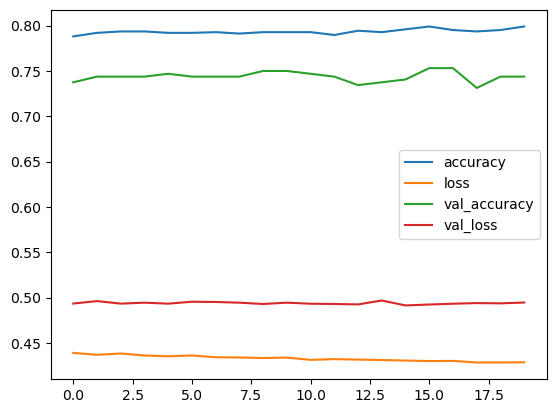

In [143]:
pd.DataFrame(history.history).plot()